In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# import from scripts directory
import sys
sys.path.append('../scripts')
from volume_z_scores import VolumeStatsProcessor
import numpy as np
import scipy.stats as stats
import ptitprince as pt


In [3]:
vsp = VolumeStatsProcessor(control_stats_files=['../data/openneuro_summary_stats.csv',
                                                '../data/goshcontrols_summary_stats.csv'])

In [4]:
vsp.load_test_subjects(['../data/GRIN2A_summary_stats.csv',
                        '../data/GRIN2A-controls_summary_stats.csv'])

In [5]:
_=vsp.z_scores_for_all_rois()

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                        

In [6]:
vsp.all_rois
cortical_rois = [roi for roi in vsp.all_rois if 'ctx' in roi]

coarse_rois = [roi for roi in vsp.all_rois if 'ctx' not in roi]

In [7]:
for r in cortical_rois:
    if 'marg' in r:
        print(r)

ctx-lh-supramarginal
ctx-rh-supramarginal


In [8]:
gene_colours = {'GRIN2A-controls':'#1f77b4',
                'GRIN2A':'#ff7f0e'}

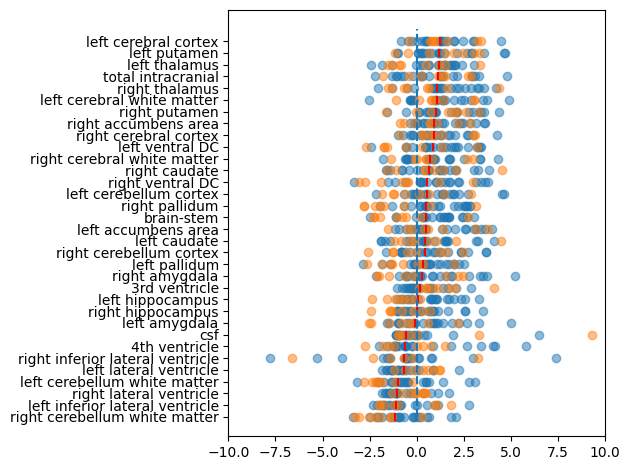

In [9]:
# list rois by median z-score
median_z = {}
for roi in coarse_rois:
    median_z[roi] = np.median(vsp.z_scores[roi])
  
sorted_rois = sorted(median_z, key=median_z.get)
sorted_rois
#scatters where x is sorted_rois and y is z_scores[roi]
fig,ax = plt.subplots()
for nr,roi in enumerate(sorted_rois):
    for gene in gene_colours.keys():
        subs = vsp.test_subs['gene']==gene
        ax.scatter( vsp.z_scores[roi][subs],[nr]*sum(subs),color=gene_colours[gene],alpha=0.5)
    # add medium line
    ax.scatter(np.median(vsp.z_scores[roi]),nr,marker='|',color='red')
ax.set_yticks(range(len(sorted_rois)))
ax.set_yticklabels(sorted_rois)
ax.set_xlim(-10,10)
ax.vlines(0,0,len(sorted_rois),linestyles='dashed')
plt.tight_layout()

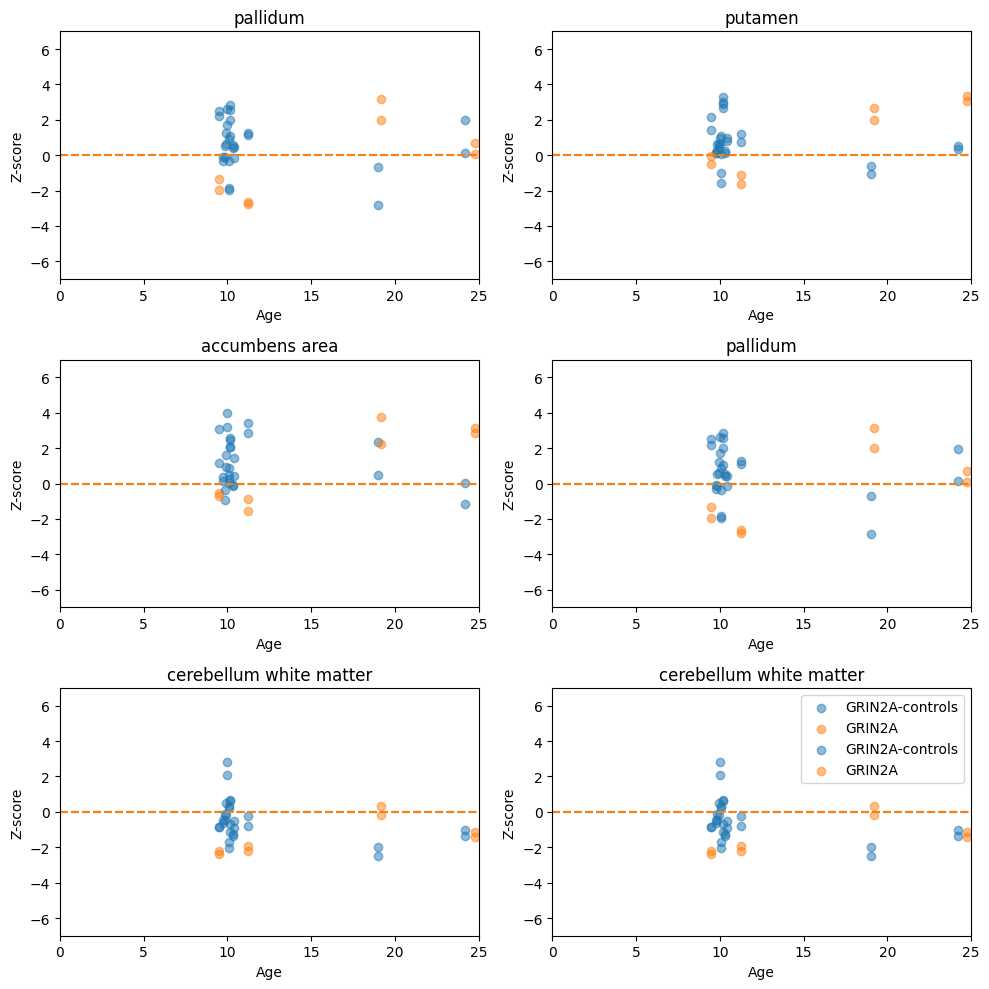

In [10]:
rois = ['pallidum','putamen','accumbens area',
        'pallidum','cerebellum white matter','cerebellum white matter']
fig,axes = plt.subplots(3,2,figsize=(10,10))
axes = axes.flatten()
ages = vsp.test_subs['Age']

for ax,roi in zip(axes,rois):
    for hemi in ['left','right']:
        for gene in gene_colours.keys():
                subs = vsp.test_subs['gene']==gene
                ax.scatter( ages[subs],vsp.z_scores[f'{hemi} {roi}'][subs],
                           color=gene_colours[gene],alpha=0.5,
                           label=gene)
     #   ax.scatter(ages,vsp.z_scores[f'{hemi} {roi}'])
        ax.set_title(roi)
        ax.set_xlabel('Age')
        ax.set_ylabel('Z-score')    
        ax.set_ylim(-7,7)
        ax.set_xlim(0,25)
        ax.plot([0,25],[0,0],linestyle='dashed')
plt.tight_layout()
plt.legend()

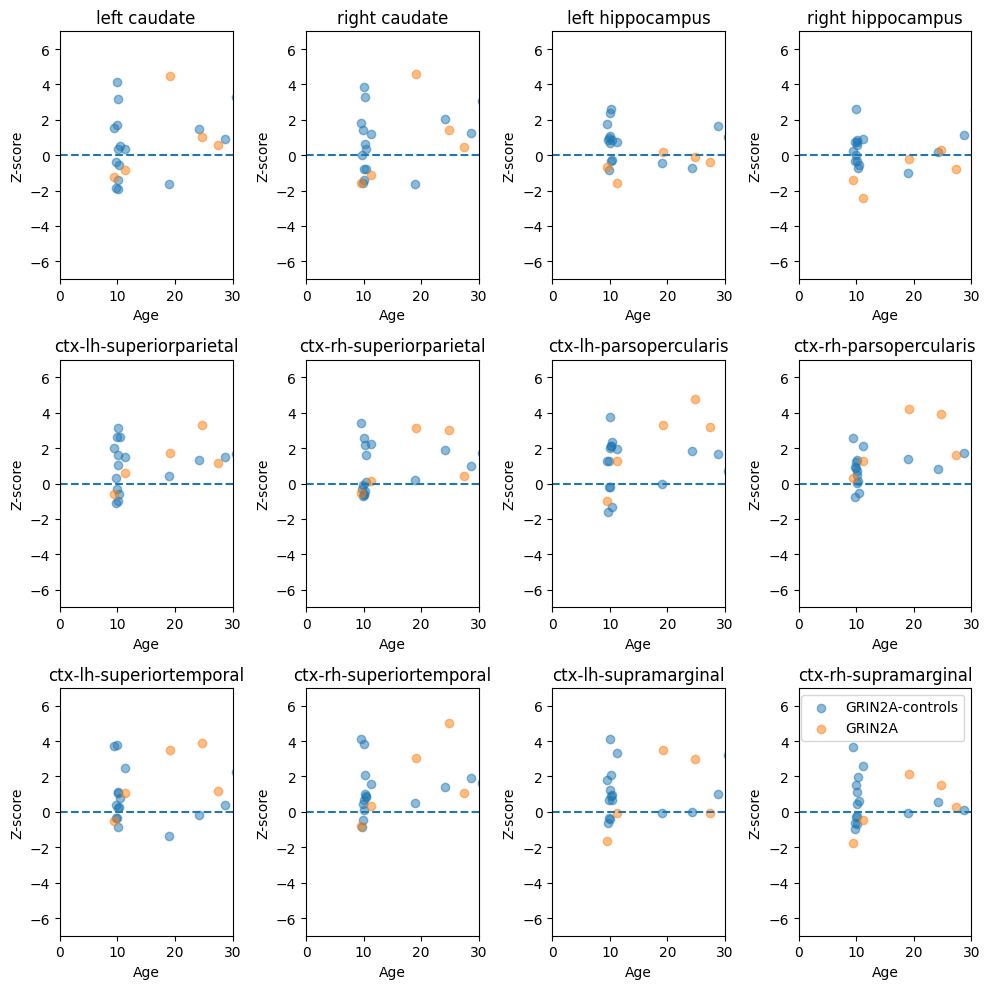

In [11]:
rois_of_interest = ['left caudate','right caudate',
                    'left hippocampus','right hippocampus',
                    'ctx-lh-superiorparietal','ctx-rh-superiorparietal',
                    'ctx-lh-parsopercularis','ctx-rh-parsopercularis',
                    'ctx-lh-superiortemporal','ctx-rh-superiortemporal',
                    'ctx-lh-supramarginal','ctx-rh-supramarginal'

]

fig,axes = plt.subplots(3,4,figsize=(10,10))
axes = axes.flatten()
ages = vsp.test_subs['Age']

for ax,roi in zip(axes,rois_of_interest):
        for gene in gene_colours.keys():
                subs = vsp.test_subs['gene']==gene
                ax.scatter( ages[subs],vsp.z_scores[roi][subs],
                           color=gene_colours[gene],alpha=0.5,
                           label=gene)
     #   ax.scatter(ages,vsp.z_scores[f'{hemi} {roi}'])
        ax.set_title(roi)
        ax.set_xlabel('Age')
        ax.set_ylabel('Z-score')    
        ax.set_ylim(-7,7)
        ax.set_xlim(0,30)
        ax.plot([0,30],[0,0],linestyle='dashed')
ax.legend()
plt.tight_layout()


In [12]:
import umap

/home/hanwang/.pyenv/versions/abagen-pyenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
umap_rois = ['left caudate','right caudate',
             'left hippocampus','right hippocampus',
             'ctx-lh-parsopercularis','ctx-rh-parsopercularis',
             'ctx-lh-parstriangularis','ctx-rh-parstriangularis',
             'right cerebellum white matter','left cerebellum white matter',
             'left amygdala','right amygdala',
]
bilat= np.array([vsp.z_scores[roi] for roi in umap_rois]).T

umap_rois = ['caudate','pallidum','putamen','accumbens area',
             'hippocampus','cerebral white matter']

#aggregate left right scores
umap_scores=[]
for roi in umap_rois:
    try:
        umap_scores.append(np.mean([vsp.z_scores[f'left {roi}'],vsp.z_scores[f'right {roi}']],axis=0))
    except KeyError:
        umap_scores.append(np.mean([vsp.z_scores[f'ctx-lh-{roi}'],vsp.z_scores[f'ctx-rh-{roi}']],axis=0))
    
umap_scores = np.array(umap_scores).T
print(umap_scores)


[[ 1.23665272e+00  3.89951926e-01  3.18060181e+00  3.00122974e+00
   8.77256425e-02  2.85787689e+00]
 [ 3.95796306e-01 -1.76511021e+00  2.77376034e+00  6.32165327e-01
  -1.22842152e+00  7.39258840e-01]
 [ 5.87677832e-02 -2.29928721e+00  2.06876676e+00  2.34524423e-01
  -1.88935924e+00  1.10121229e-02]
 [ 5.14918959e-01 -1.22567632e+00  7.26239248e-01  6.51897701e-01
  -5.83119377e-01  1.11293218e+00]
 [ 4.52944604e+00  2.58519287e+00  2.31999464e+00  3.00527863e+00
   1.46940319e-03  3.01465356e+00]
 [ 2.08099666e+00 -1.45529207e-01  1.76615201e+00  7.26631552e-01
  -1.17366305e-01  6.62651493e-01]
 [-9.68146784e-01 -2.69630568e+00 -1.36133363e+00 -1.20834243e+00
  -1.98561693e+00  3.84242780e-01]
 [-1.39946757e+00 -1.65383869e+00 -2.51486314e-01 -5.96773993e-01
  -1.03648287e+00 -1.21452751e+00]
 [-1.64382865e+00 -1.76293216e+00 -8.21648663e-01  1.40818022e+00
  -7.42080029e-01 -4.93306114e-01]
 [ 1.74500453e+00  1.05555325e+00  4.27033907e-01 -5.71687553e-01
  -2.91835219e-01  1.1843

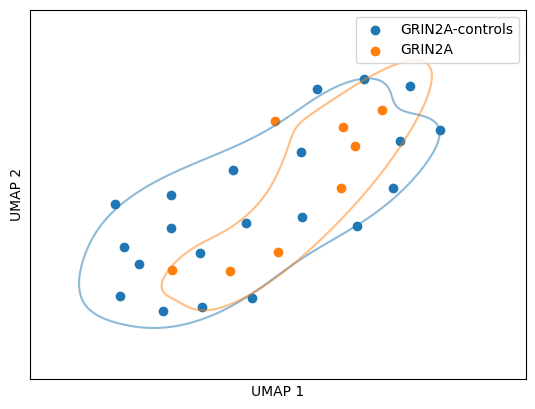

In [48]:
reducer = umap.UMAP()
e2 = reducer.fit_transform(umap_scores,)
fig,ax = plt.subplots()
for gene in gene_colours.keys():
        if gene=='CAS':
                continue
        else:
                subs = vsp.test_subs['gene']==gene
                ax.scatter(e2[subs,0],e2[subs,1],color=gene_colours[gene],label=gene)
                sns.kdeplot(x=e2[subs, 0], y=e2[subs, 1], ax=ax, color=gene_colours[gene], alpha=0.5, levels=2, thresh=0.4)


ax.set_xlim([np.min(e2[:,0])-1,np.max(e2[:,0])+1])
ax.set_ylim([np.min(e2[:,1])-1,np.max(e2[:,1])+1])
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
plt.legend()
plt.savefig('../outputs/umap.pdf')


In [15]:
#pairwise t-tests between given gene and other genes. Keep results
from scipy.stats import ttest_ind

ts=np.zeros((len(sorted_rois),2))
ps = np.zeros((len(sorted_rois),2))
gene1='KANSL1'
gene2s = ['GRIN2A','FOXP2']
for ri,roi in enumerate(sorted_rois):
    for gi,gene2 in enumerate(gene2s):
        if gene1==gene2:
            continue
        subs1 = vsp.test_subs['gene']==gene1
        subs2 = vsp.test_subs['gene']==gene2
        t,p = ttest_ind(vsp.z_scores[roi][subs1],vsp.z_scores[roi][subs2])
        ts[ri,gi]=t
        ps[ri,gi]=p
        #print(f'{gene1} vs {gene2} t={t}, p={p}')

/home/hanwang/.pyenv/versions/abagen-pyenv/lib/python3.11/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [36]:
# Inspect the min and max ages of control and test subjects
print("Control subject min age: ", vsp.controls['Age'].min())
print("Control subject max age: ", vsp.controls['Age'].max())
print("Test subject min age: ", vsp.test_subs['Age'].min())
print("Test subject max age: ", vsp.test_subs['Age'].max())

Control subject min age:  3.518138261
Control subject max age:  39.0
Test subject min age:  9.5
Test subject max age:  64.42


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


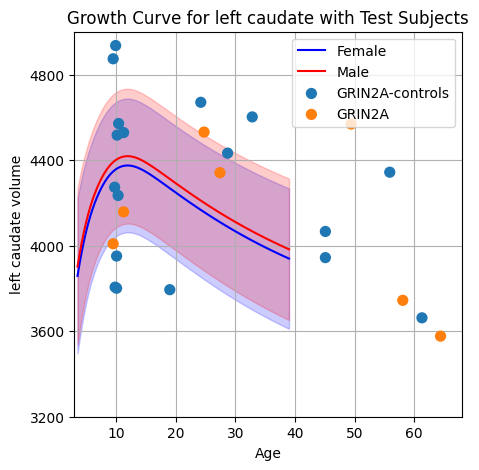

In [37]:
from pygam import LinearGAM,s, f, ExpectileGAM
controls = vsp.controls
test_subs = vsp.test_subs

roi = 'left caudate'
# Step 1: Prepare the input features for controls
X_controls = np.zeros((len(controls), 2))
X_controls[:, 0] = np.log(controls['Age'])
X_controls[:, 1] = (controls['Sex'] == 'M').astype(int)

# Extract ROI values for controls
y_controls = controls[roi].values

# Step 2: Fit the GAM location model
location_model = LinearGAM(s(0) + f(1)).gridsearch(X_controls, y_controls)
y_pred_mean = location_model.predict(X_controls)

# Step 3: Fit the GAM scale model
residuals = y_controls - y_pred_mean
scale_model = LinearGAM(s(0) + f(1)).gridsearch(X_controls, np.abs(residuals))
y_pred_scale = scale_model.predict(X_controls)

# Step 4: Prepare the input features for the test subjects
X_test = np.zeros((len(test_subs), 2))
X_test[:, 0] = np.log(test_subs['Age'])
X_test[:, 1] = (np.logical_or(test_subs['Sex'] == 'M', test_subs['Sex'] == 'm')).astype(int)

# Predict mean and scale for the test subjects
y_pred_test_mean = location_model.predict(X_test)
y_pred_test_scale = scale_model.predict(X_test)

# Calculate residuals and z-scores for the test subjects
y_test = test_subs[roi].values
residuals_test = y_test - y_pred_test_mean
z_scores = residuals_test / y_pred_test_scale

# Plot growth curves with scatter points for test subjects
plt.figure(figsize=(5, 5))

# Plot predicted mean for controls
ages = np.linspace(min(controls['Age']), max(controls['Age']), 100)
ages_log = np.log(ages)
sexes = [0, 1]  # Female and Male
colors = ['blue', 'red']
sex_label = ['Female','Male']
for sex, color in zip(sexes, colors):
    X_plot = np.column_stack([ages_log, np.full_like(ages_log, sex)])
    mean_pred = location_model.predict(X_plot)
    scale_pred = scale_model.predict(X_plot)
    plt.plot(ages, mean_pred, color=color, label=sex_label[sex])
    plt.fill_between(
        ages,
        mean_pred - scale_pred,
        mean_pred + scale_pred,
        color=color,
        alpha=0.2,
       # label=f"± Scale (Sex={sex})"
    )

# Scatter test subjects
test_gene_colors = test_subs['gene'].map(gene_colours)
test_sex_colors = test_subs['Sex'].map({'M': 'red', 'm': 'red', 'F': 'blue', 'f': 'blue'})
for gene in gene_colours.keys():
    if gene == 'CAS':
        continue
    else:
        subs = test_subs['gene'] == gene
        plt.scatter(test_subs['Age'][subs], y_test[subs], c=test_gene_colors[subs], 
                    edgecolor=test_gene_colors[subs], label=gene, zorder=5,
                    s=50)
#plt.scatter(test_subs['Age'], y_test, c=test_gene_colors, edgecolor='black', label='Test Subjects', zorder=5)

plt.xlabel('Age')
plt.ylabel(f'{roi} volume')
plt.title(f'Growth Curve for {roi} with Test Subjects')
plt.legend()
plt.grid(True)
plt.xlim([3,68])
plt.ylim([3200,5000])
plt.yticks([3200,3600,4000,4400,4800])
plt.savefig('../outputs/growth_curve.pdf')


In [17]:
test_gene_colors

0     #ff7f0e
1     #ff7f0e
2     #ff7f0e
3     #ff7f0e
4     #ff7f0e
5     #ff7f0e
6     #ff7f0e
7     #ff7f0e
8     #1f77b4
9     #1f77b4
10    #1f77b4
11    #1f77b4
12    #1f77b4
13    #1f77b4
14    #1f77b4
15    #1f77b4
16    #1f77b4
17    #1f77b4
18    #1f77b4
19    #1f77b4
20    #1f77b4
21    #1f77b4
22    #1f77b4
23    #1f77b4
24    #1f77b4
25    #1f77b4
26    #1f77b4
27    #1f77b4
28    #1f77b4
Name: gene, dtype: object

In [18]:
av_ts = np.mean(ts,axis=1)
sorted_t_rois = [roi for t,roi in sorted(zip(av_ts,sorted_rois),key=lambda x:x[0])]
sorted_t_rois, np.sort(av_ts)

(['right cerebellum white matter',
  'left inferior lateral ventricle',
  'right lateral ventricle',
  'left cerebellum white matter',
  'left lateral ventricle',
  'right inferior lateral ventricle',
  '4th ventricle',
  'csf',
  'left amygdala',
  'right hippocampus',
  'left hippocampus',
  '3rd ventricle',
  'right amygdala',
  'left pallidum',
  'right cerebellum cortex',
  'left caudate',
  'left accumbens area',
  'brain-stem',
  'right pallidum',
  'left cerebellum cortex',
  'right ventral DC',
  'right caudate',
  'right cerebral white matter',
  'left ventral DC',
  'right cerebral cortex',
  'right accumbens area',
  'right putamen',
  'left cerebral white matter',
  'right thalamus',
  'total intracranial',
  'left thalamus',
  'left putamen',
  'left cerebral cortex'],
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]))

In [41]:
def plot_growth_curve(roi, ax, controls, test_subs, gene_colours):
    """
    Plot growth curves for the specified ROI with test subjects.

    Parameters:
        roi (str): Region of interest (e.g., 'caudate').
        ax (matplotlib.axes.Axes): Matplotlib Axes object to plot on.
        controls (DataFrame): DataFrame containing control subjects' data.
        test_subs (DataFrame): DataFrame containing test subjects' data.
        gene_colours (dict): Mapping of gene names to colors.
    """
    # Step 1: Prepare the input features for controls
    X_controls = np.zeros((len(controls), 2))
    X_controls[:, 0] = np.log(controls['Age'])
    X_controls[:, 1] = (controls['Sex'] == 'M').astype(int)

    # Combine left and right ROI
        
    try:
        l_roi = f'left {roi}'
        r_roi = f'right {roi}'
        controls[l_roi]
    except KeyError:
        l_roi = f'ctx-lh-{roi}'
        r_roi = f'ctx-rh-{roi}'
    y_controls = (controls[l_roi].values + controls[r_roi].values) / 2

    # Step 2: Fit the GAM location model
    location_model = LinearGAM(s(0) + f(1)).gridsearch(X_controls, y_controls)
    y_pred_mean = location_model.predict(X_controls)

    # Step 3: Fit the GAM scale model
    residuals = y_controls - y_pred_mean
    scale_model = LinearGAM(s(0) + f(1)).gridsearch(X_controls, np.abs(residuals))
    y_pred_scale = scale_model.predict(X_controls)

    # Step 4: Prepare the input features for the test subjects
    X_test = np.zeros((len(test_subs), 2))
    X_test[:, 0] = np.log(test_subs['Age'])
    X_test[:, 1] = (np.logical_or(test_subs['Sex'] == 'M', test_subs['Sex'] == 'm')).astype(int)

    # Predict mean and scale for the test subjects
    y_pred_test_mean = location_model.predict(X_test)
    y_pred_test_scale = scale_model.predict(X_test)

    # Calculate residuals and z-scores for the test subjects
    y_test = (test_subs[l_roi].values + test_subs[r_roi].values) / 2
    residuals_test = y_test - y_pred_test_mean
    z_scores = residuals_test / y_pred_test_scale

    # Plot growth curves
    ages = np.linspace(min(controls['Age']), max(controls['Age']), 100)
    ages_log = np.log(ages)
    sexes = [0, 1]  # Female and Male
    colors = ['blue', 'red']
    sex_label = ['Female', 'Male']

    for sex, color in zip(sexes, colors):
        X_plot = np.column_stack([ages_log, np.full_like(ages_log, sex)])
        mean_pred = location_model.predict(X_plot)
        scale_pred = scale_model.predict(X_plot)
        ax.plot(ages, mean_pred, color=color, label=sex_label[sex])
        ax.fill_between(
            ages,
            mean_pred - scale_pred,
            mean_pred + scale_pred,
            color=color,
            alpha=0.2,
        )

    # Scatter test subjects
    test_gene_colors = test_subs['gene'].map(gene_colours)
    for gene in gene_colours.keys():
        if gene == 'CAS':
            continue
        subs = test_subs['gene'] == gene
        ax.scatter(
            test_subs['Age'][subs], y_test[subs], c=test_gene_colors[subs],
            edgecolor=test_gene_colors[subs], label=gene, zorder=5, s=50
        )

    # Customize plot
    ax.set_xlabel('Age')
    ax.set_ylabel(f'{roi} volume')
    ax.set_title(f'Growth Curve for {roi} with CAS subjects')
    ax.legend()
    ax.grid(True)
    ax.set_xlim([3, 70])
    #define ylimits based on the data
    ymins = [min(y_test), min(y_pred_mean)]
    ymin = min(ymins)*0.9
    ymaxs = [max(y_test), max(y_pred_mean)]
    ymax = max(ymaxs)*1.05
    ax.set_ylim([ymin, ymax])
    ax.set_yticks([ymin, ymin + (ymax-ymin)/3, ymin + 2*(ymax-ymin)/3, ymax])
    return z_scores

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


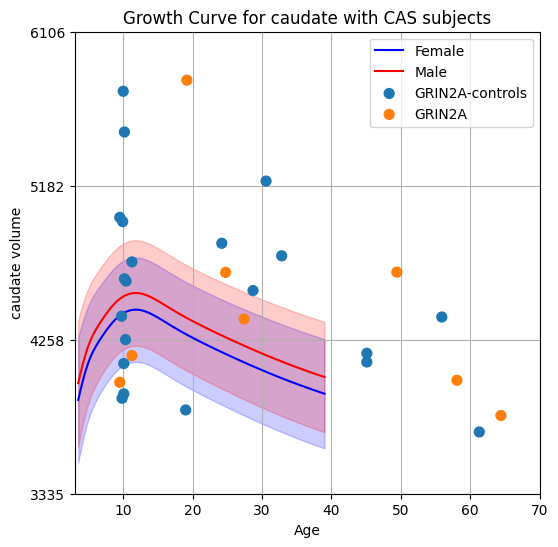

In [42]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
z_scores = plot_growth_curve('caudate', ax, controls, test_subs, gene_colours)
plt.savefig('../outputs/growth_curve.pdf')

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


caudate
hippocampus


 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


superiorparietal
parsopercularis


 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


superiortemporal
supramarginal


 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


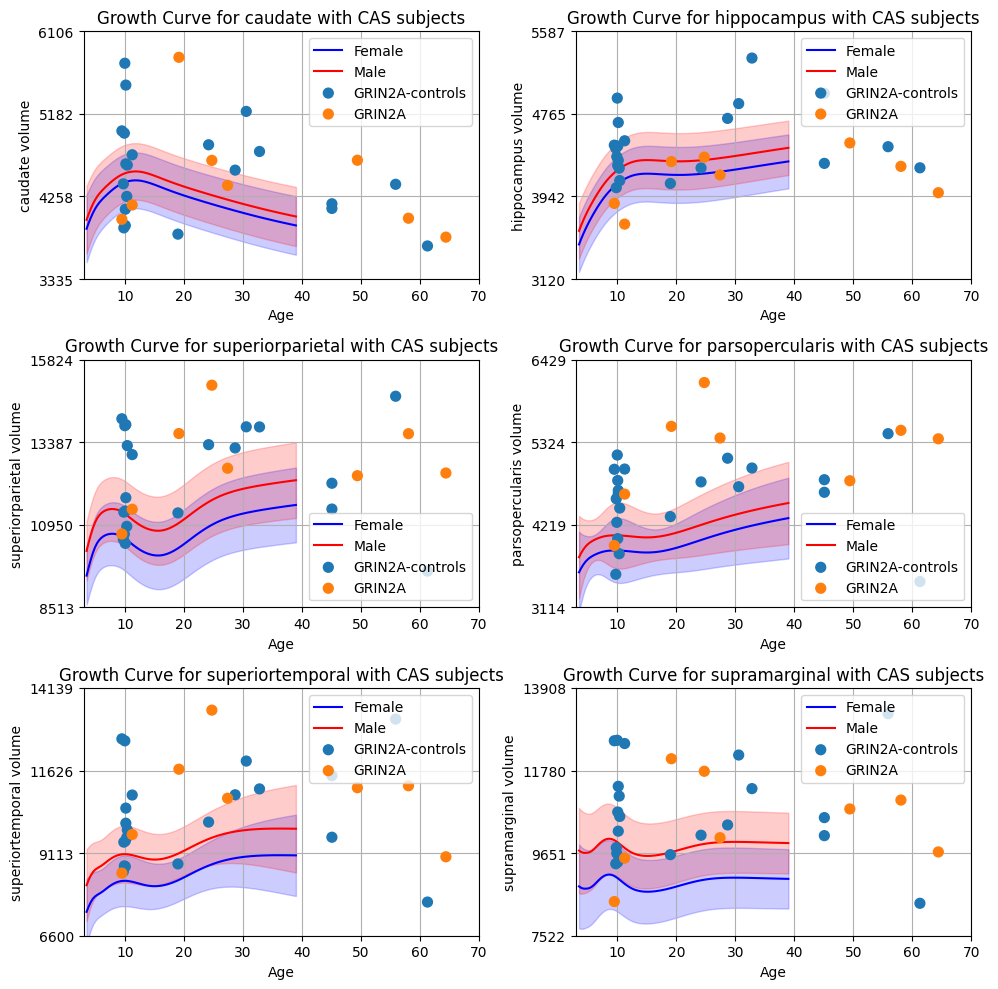

In [43]:
fig,axes = plt.subplots(3, 2, figsize=(10, 10))
rois = ['caudate', 'hippocampus', 'superiorparietal',
        'parsopercularis','superiortemporal','supramarginal']

axes = axes.flatten()
z_scores_bilateral = {}
speech_z_scores = np.zeros((len(test_subs), len(rois)))
k=0
for roi, ax in zip(rois, axes):
        print(roi)
        z_scores_bilateral[roi] =plot_growth_curve(roi, ax, controls, test_subs, gene_colours)
        speech_z_scores[:,k] = z_scores_bilateral[roi]
        k+=1

plt.tight_layout()
plt.savefig('../outputs/growth_curve.pdf')

In [63]:
bilateral_rois = []
for r in vsp.all_rois[1:]:
    if 'left' in r:
        bilateral_rois.append(r[5:])
    elif 'ctx-lh-' in r:
        bilateral_rois.append(r[7:])

all_bilateral_z_scores = {}
all_signed_z_scores= np.zeros((len(bilateral_rois), len(test_subs)))
for ri,roi in enumerate(bilateral_rois):
    z = plot_growth_curve(roi, ax, controls, test_subs, gene_colours)
    all_bilateral_z_scores[roi] = np.abs(z)
    all_signed_z_scores[ri] = z


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

In [363]:
# test 1 are regions in language higher z than chance
speech_rois = ['caudate', 'putamen', 'pallidum', 
        'parsopercularis', 'supramarginal', 'superiortemporal']

threshold = 2.5
sub_mask = test_subs['gene']!='CAS'
test_zs = np.zeros((len(speech_rois), sum(sub_mask)))
for ri,roi in enumerate(speech_rois):
    test_zs[ri] = all_bilateral_z_scores[roi][sub_mask] > threshold

n_perm = 10000
n_rois = len(speech_rois)
n_subs = sum(sub_mask)
all_perm = np.zeros((n_perm, n_rois,n_subs))
for i in range(n_perm):
    random_rois = np.random.choice(bilateral_rois, n_rois, replace=False)
    for j, roi in enumerate(random_rois):
        all_perm[i,j,:] = all_bilateral_z_scores[roi][sub_mask] >threshold
        
mean_test_zs = np.mean(test_zs)
perm_means = np.mean(all_perm, axis=(1,2))
perm_std = np.std(all_perm, axis=(1,2))
(mean_test_zs-np.mean(perm_means))/np.std(perm_means)

1.78453520731164

Text(0.5, 0, '')

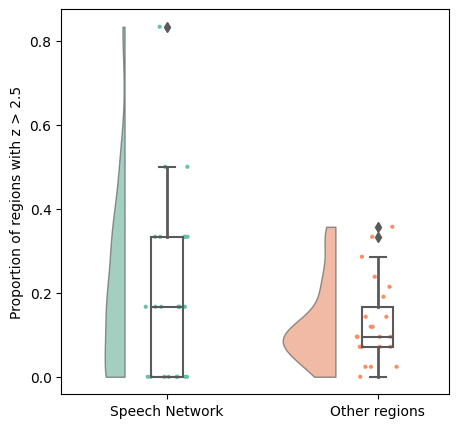

In [364]:
speech_zs = np.zeros((len(speech_rois), sum(sub_mask)))
non_speech_zs = np.zeros((len(bilateral_rois)-len(speech_rois), sum(sub_mask)))
si=0
ns=0
for roi in bilateral_rois:
    if roi in speech_rois:
        speech_zs[si] = all_bilateral_z_scores[roi][sub_mask] > threshold
        si+=1
    else:
        non_speech_zs[ns] = all_bilateral_z_scores[roi][sub_mask] > threshold
        ns+=1
        
speech_counts = np.mean(speech_zs, axis=0)
non_speech_counts = np.mean(non_speech_zs, axis=0)
#raincloud plot
data = pd.DataFrame(data =np.array([np.hstack([speech_counts, non_speech_counts]).T,
                            np.hstack([np.zeros_like(speech_counts), np.ones_like(non_speech_counts)]).T]).T,
                    columns=['Counts','Speech_network'])
fig, ax = plt.subplots(figsize=(5, 5))
pt.RainCloud(data=data, x='Speech_network', y='Counts', ax=ax, orient='v', 
             alpha=0.65, dodge=True, bw=0.4, width_viol=0.5, )
ax.set_ylabel('Proportion of regions with z > 2.5')
ax.set_xticklabels(['Speech Network', 'Other regions'])
t_stat_speech,pval = stats.ttest_ind(speech_counts, non_speech_counts)
ax.set_xlabel('')

0.0447


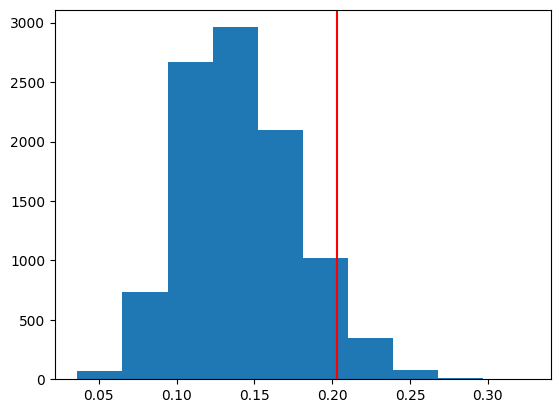

In [255]:
#permutation test
mean_test_zs = np.mean(test_zs)
perm_means = np.mean(all_perm, axis=(1,2))
p = np.sum(perm_means > mean_test_zs) / n_perm
fig,ax = plt.subplots()#
ax.hist(perm_means)
plt.axvline(mean_test_zs, color='red')

print(p)

In [260]:
#per subject test scores
per_sub_test = np.mean(test_zs, axis=0)
#behavioural severity scores
severity = np.zeros(len(test_subs))
#grin2a scores
grin2a = pd.read_csv('../../bids_data/grin2a/participants.tsv', sep='\t')
foxp2 = pd.read_csv('../../bids_data/foxp2/participants.tsv', sep='\t')
for i,sub in enumerate(test_subs['subject']):
    gene = test_subs['gene'].iloc[i]
    if gene == 'GRIN2A':
        severity[i] = grin2a.loc[grin2a['participant_id'] == sub, 'speech'].values[0]
    elif gene == 'FOXP2':
        severity[i] = foxp2.loc[foxp2['participant_id'] == sub, 'speech'].values[0]
    else:
        severity[i] = np.nan


,participant_id,sex,age,months,group,gene,speech
0,sub-A002,m,8.916667,107,genetic,FOXP2,3
1,sub-001,f,30.000000,360,genetic,FOXP2,1
2,sub-002,f,38.000000,456,genetic,FOXP2,1
3,sub-003,m,7.000000,84,genetic,FOXP2,3
4,sub-UK003,m,10.250000,123,genetic,CAS,na
5,sub-UK004,m,10.500000,126,genetic,CAS,na
6,sub-UK005,m,13.500000,162,genetic,FOXP2,4
7,sub-UK015,f,11.750000,141,genetic,FOXP2,3


-1.0516840427821925


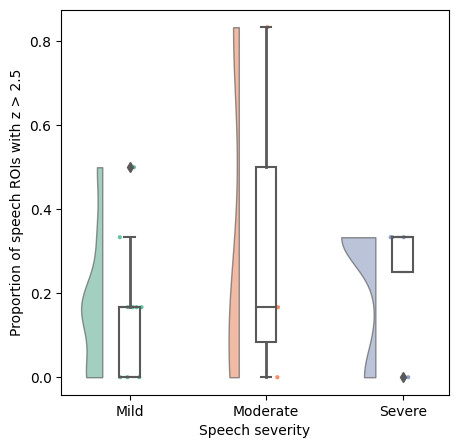

In [377]:
import seaborn as sns
#fig, ax = plt.subplots()
#sns.kdeplot( per_sub_test[severity[sub_mask]==1], label='mild',ax=ax,)
#sns.kdeplot( per_sub_test[severity[sub_mask]>1], label='moderate+',   ax=ax,)
#ax.set_xlim([-1, 10])
#ax.set_xlabel('MRI speech ROIs with z > {}'.format(threshold))

#plt.legend()
#raincloud plot
severity[severity==4]=3
data = pd.DataFrame(data =np.array([per_sub_test[~np.isnan(severity[sub_mask])], 
                                    severity[sub_mask][~np.isnan(severity[sub_mask])]]).T,
                    columns=['Counts','Speech severity'])
fig, ax = plt.subplots(figsize=(5, 5))
pt.RainCloud(data=data, x='Speech severity', y='Counts', ax=ax, orient='v',
                alpha=0.65, dodge=True, bw=0.4, width_viol=0.5, )   

ax.set_ylabel('Proportion of speech ROIs with z > 2.5')
ax.set_xlabel('Speech severity')
ax.set_xticklabels(['Mild', 'Moderate', 'Severe'])

t_stat_severity,pval = stats.ttest_ind(per_sub_test[severity[sub_mask]==1], per_sub_test[severity[sub_mask]>1])
print(t_stat_severity)

Text(3.5, 0.5, 'ρ = 0.24')

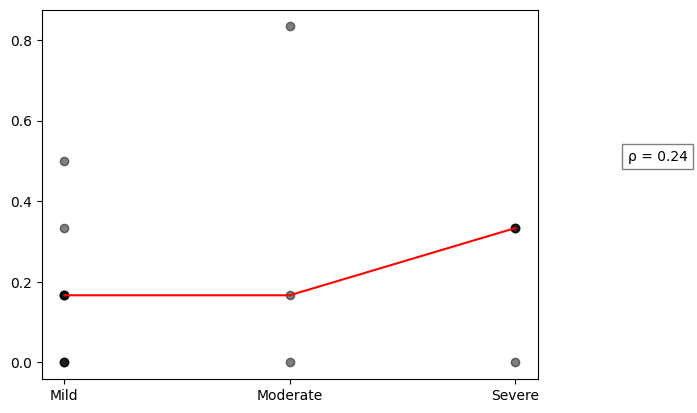

In [306]:
fig,ax = plt.subplots()
ax.scatter(data['Speech severity'], data['Counts'], color='black', alpha=0.5)
#add the medians
ax.plot([1,2,3], 
        [np.median(data['Counts'][data['Speech severity']==1]),
            np.median(data['Counts'][data['Speech severity']==2]),
            np.median(data['Counts'][data['Speech severity']==3])],
          color='red')

ax.set_xticks([1,2,3])
ax.set_xticklabels(['Mild', 'Moderate',  'Severe'])
rho,p=stats.spearmanr(data['Speech severity'], data['Counts'])
#add rho to plot in a box top right
ax.text(3.5, 0.5, 'ρ = {:.2f}'.format(rho), bbox=dict(facecolor='white', alpha=0.5))

In [244]:
from statsmodels.stats.power import TTestIndPower


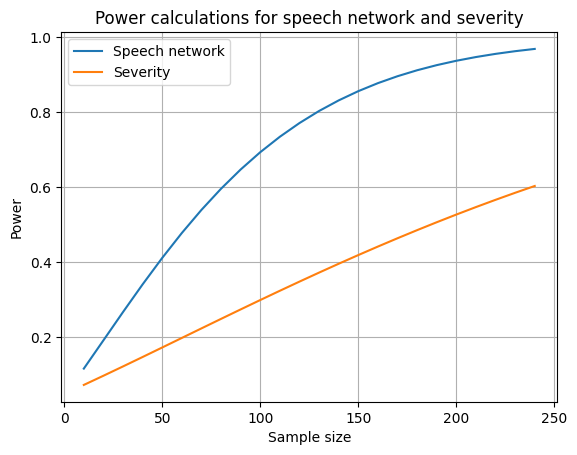

In [236]:
group1 =per_sub_test[severity[sub_mask]==1]
group2 = per_sub_test[severity[sub_mask]>1]
def cohens_d(group1, group2):
    diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    return diff / np.sqrt(pooled_var)

def power_analysis(group1, group2,sample_sizes=range(10,200,10)):
    power = TTestIndPower()
    effect_size = cohens_d(group1, group2)
    alpha = 0.05
    powers = np.zeros(len(sample_sizes))
    for ni,n in enumerate(sample_sizes):
        powers[ni]=power.solve_power(effect_size=effect_size, nobs1=n, alpha=alpha, alternative='two-sided')
    return powers

#power calculations
sample_sizes=range(10,250,10)
speech_network_power = power_analysis(speech_counts, non_speech_counts,
                                      sample_sizes=sample_sizes)
severity_power = power_analysis(per_sub_test[severity[sub_mask]==1], per_sub_test[severity[sub_mask]>1],
                                sample_sizes=sample_sizes)
fig, ax = plt.subplots()
ax.set_xlabel('Sample size')
ax.set_ylabel('Power')
ax.plot(sample_sizes, speech_network_power, label='Speech network')
ax.plot(sample_sizes, severity_power,label='Severity' )
ax.set_title('Power calculations for speech network and severity')
#grid
ax.grid(True)
plt.legend()

/Users/konrad/miniconda3/envs/meld_graph/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/konrad/miniconda3/envs/meld_graph/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/konrad/miniconda3/envs/meld_graph/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/konrad/miniconda3/envs/meld_graph/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarni

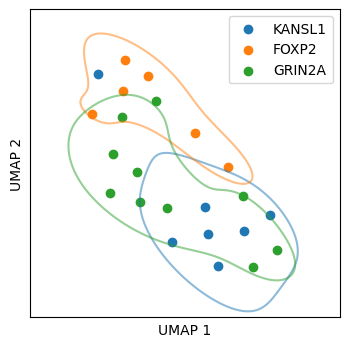

In [355]:

reducer = umap.UMAP(random_state=3)
3

e2 = reducer.fit_transform(speech_z_scores,)
#pca reducer
from sklearn.decomposition import PCA
reducer = PCA(n_components=3)
#e2 = reducer.fit_transform(all_signed_z_scores.T)
fig,ax = plt.subplots(figsize=(4,4))
for gene in gene_colours.keys():
        if gene=='CAS':
                continue
        else:
                subs = vsp.test_subs['gene']==gene
                ax.scatter(e2[subs,0],e2[subs,1],color=gene_colours[gene],label=gene)
                sns.kdeplot(e2[subs,0],e2[subs,1],color=gene_colours[gene],alpha=0.5,ax=ax,
                levels=2,thresh=0.4,#
                )


ax.set_xlim([np.min(e2[:,0])-1,np.max(e2[:,0])+1])
ax.set_ylim([np.min(e2[:,1])-1,np.max(e2[:,1])+1])
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
plt.legend()
plt.savefig('umap_genes.pdf')


In [356]:
#raincloud plot
                        

In [335]:
all_signed_z_scores.shape

(48, 25)

IndexError: index 15 is out of bounds for axis 1 with size 6

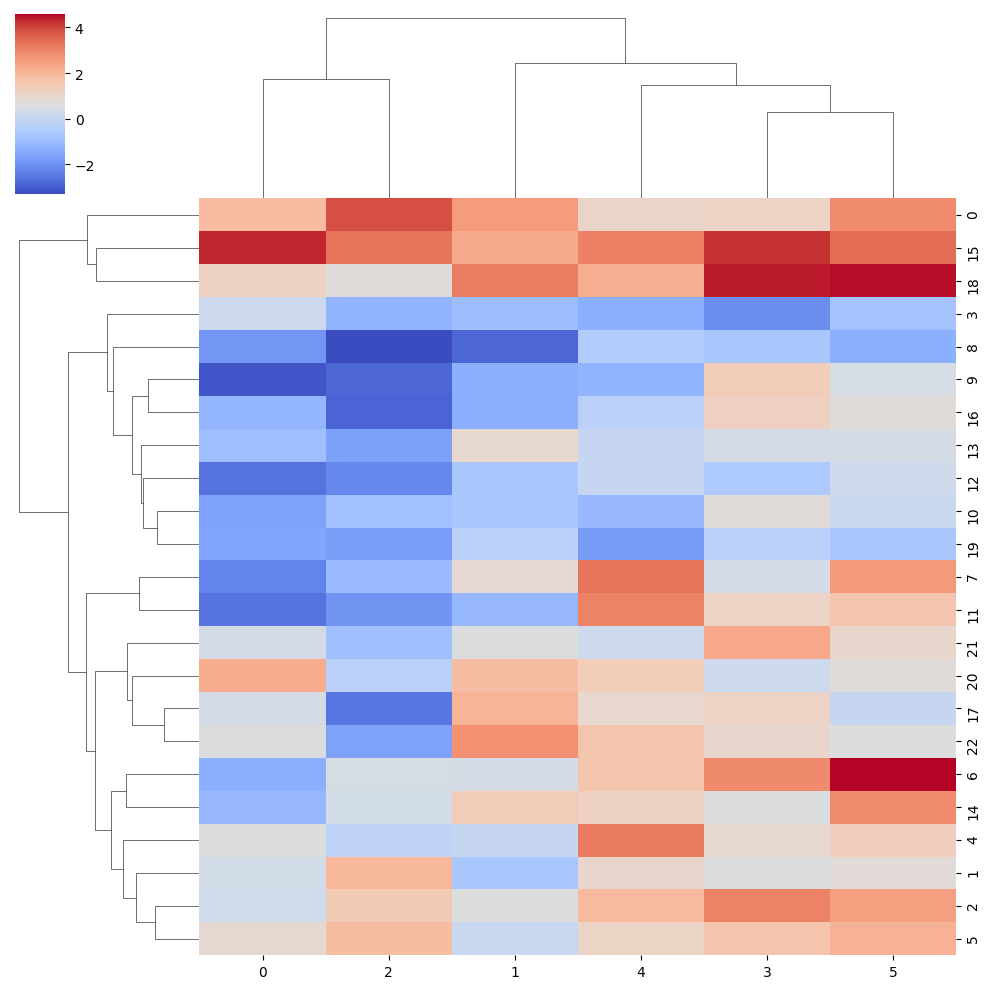

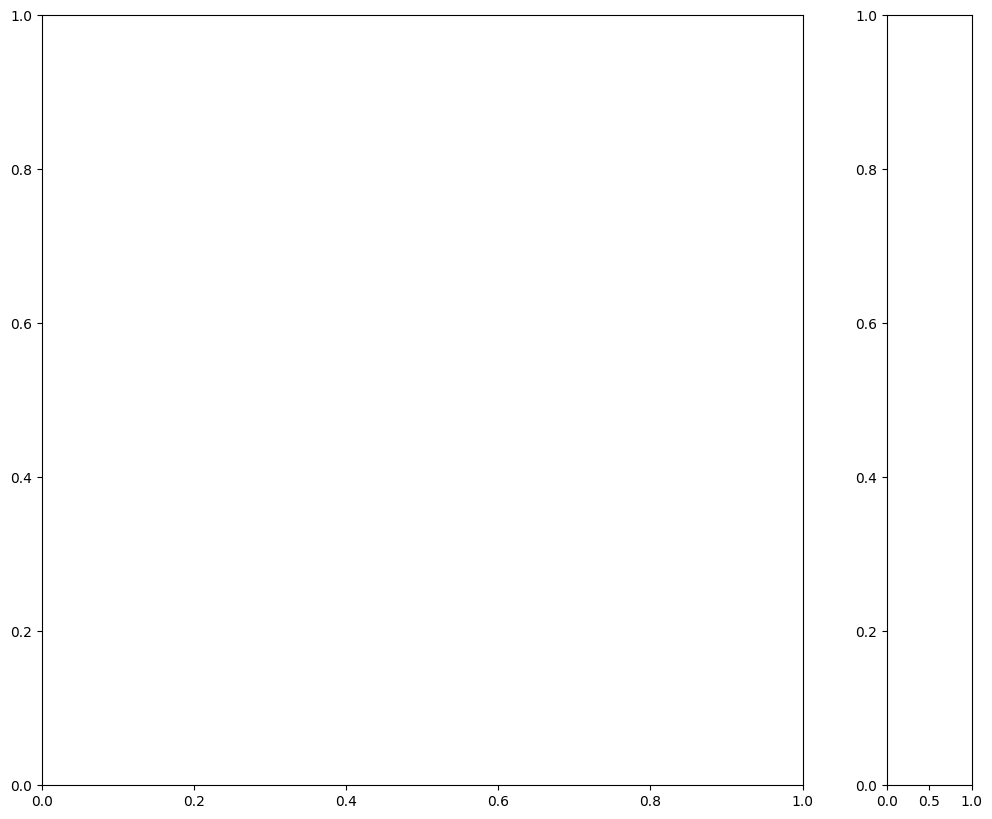

In [329]:
mask_cas = vsp.test_subs['gene']!='CAS'
cluster_grid = np.corrcoef(speech_z_scores[mask_cas,:])
masked_zscores= speech_z_scores[mask_cas,:]
masked_genes = np.array([gene for gene in vsp.test_subs['gene'][mask_cas]])

clustergrid = sns.clustermap(masked_zscores, cmap='coolwarm', figsize=(10, 10), metric='euclidean', method='average')

# Extract the clustering order
cluster_order = clustergrid.dendrogram_row.reordered_ind
ordered_genes = [masked_genes[i] for i in cluster_order]

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [9, 1]}, figsize=(12, 10))

# Main clustered heatmap
sns.heatmap(masked_zscores[cluster_order,:][:, cluster_order], cmap='coolwarm', ax=ax[0], cbar=False)
ax[0].set_title("Clustered Anatomical Correlation Heatmap")
#remove ticks
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Subjects')
ax[0].set_ylabel('Subjects')

# Diagnoses vector
gene_colors = [gene_colours[gene] for gene in ordered_genes]
for i, color in enumerate(gene_colors):
    ax[1].add_patch(plt.Rectangle((0, i), 1, 1, color=color))
ax[1].set_ylim(len(cluster_grid), 0)  # Align with heatmap
ax[1].axis('off')  # Hide axes
ax[1].set_title("Gene group")

#skip CAS
gene_colours_no_cas = {gene: color for gene, color in gene_colours.items() if gene != 'CAS'}
legend_elements = [
    plt.Line2D([0], [0], color=color, lw=4, label=gene)
    for gene, color in gene_colours_no_cas.items()
]
fig.legend(
    handles=legend_elements,
    loc='center right',
    bbox_to_anchor=(1.3, 0.5),
    title="Gene Colors",
    fontsize='small',
)

plt.tight_layout()


In [326]:
gene_colours.items()

dict_items([('KANSL1', '#1f77b4'), ('FOXP2', '#ff7f0e'), ('CAS', '#d62728'), ('GRIN2A', '#2ca02c')])

In [323]:
legend_elements[0]

In [313]:
ordered_genes

[array(['KANSL1', 'KANSL1', 'KANSL1', 'KANSL1', 'KANSL1', 'KANSL1',
        'KANSL1', 'FOXP2', 'FOXP2', 'FOXP2', 'FOXP2', 'FOXP2', 'FOXP2',
        'GRIN2A', 'GRIN2A', 'GRIN2A', 'GRIN2A', 'GRIN2A', 'GRIN2A',
        'GRIN2A', 'GRIN2A', 'GRIN2A', 'GRIN2A'], dtype='<U6'),
 array(['KANSL1', 'KANSL1', 'KANSL1', 'KANSL1', 'KANSL1', 'KANSL1',
        'KANSL1', 'FOXP2', 'FOXP2', 'FOXP2', 'FOXP2', 'FOXP2', 'FOXP2',
        'GRIN2A', 'GRIN2A', 'GRIN2A', 'GRIN2A', 'GRIN2A', 'GRIN2A',
        'GRIN2A', 'GRIN2A', 'GRIN2A', 'GRIN2A'], dtype='<U6'),
 array(['KANSL1', 'KANSL1', 'KANSL1', 'KANSL1', 'KANSL1', 'KANSL1',
        'KANSL1', 'FOXP2', 'FOXP2', 'FOXP2', 'FOXP2', 'FOXP2', 'FOXP2',
        'GRIN2A', 'GRIN2A', 'GRIN2A', 'GRIN2A', 'GRIN2A', 'GRIN2A',
        'GRIN2A', 'GRIN2A', 'GRIN2A', 'GRIN2A'], dtype='<U6'),
 array(['KANSL1', 'KANSL1', 'KANSL1', 'KANSL1', 'KANSL1', 'KANSL1',
        'KANSL1', 'FOXP2', 'FOXP2', 'FOXP2', 'FOXP2', 'FOXP2', 'FOXP2',
        'GRIN2A', 'GRIN2A', 'GRIN2A', 'GRIN2A',